In [1]:
import pandas as pd              #import the libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')     #read the data set

In [3]:
data.drop(['ID','Speed_10'],axis=1,inplace=True)    #remove the unnecessary coloumn

In [4]:
Gend = pd.get_dummies(data['Gender'],drop_first=True)   #gender is converted into numerical values

In [5]:
Stud=pd.get_dummies(data['Study'])   #study is converted into numerical values

In [6]:
Grou=pd.get_dummies(data['Group'],drop_first=True)   #group(Ga,Ju,Si) is converted into numerical values

In [7]:
data.drop(['Gender','Study','Group'],axis=1,inplace=True)  #drop the features to convert into numerical values

In [8]:
data = pd.concat([data,Gend,Stud,Grou],axis=1)   #The new numerical features were replaced

In [9]:
data  #visualizing the data set

,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),male,Ga,Ju,Si,PD
0,82,1.45,50,3.0,20,10,36.34,0.6635,0,1,0,0,1
1,68,1.71,78,2.5,25,8,11.00,0.6420,1,1,0,0,1
2,82,1.53,51,2.5,24,5,14.50,0.9080,0,1,0,0,1
3,72,1.70,82,2.0,16,13,10.47,0.8480,1,1,0,0,1
4,53,1.67,54,3.0,44,22,18.34,0.6770,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,60,1.74,72,0.0,0,0,9.20,1.0000,1,0,0,1,0
162,67,1.90,95,0.0,0,0,12.52,1.1200,1,0,0,1,0
163,61,1.70,72,0.0,0,0,12.65,0.9900,1,0,0,1,0
164,53,1.70,87,0.0,0,0,11.41,1.2900,1,0,0,1,0


In [10]:
data.drop(['Weight (kg)','HoehnYahr','UPDRS','UPDRSM'],axis = 1,inplace = True)  #drop the unnecessary features

In [11]:
X = data.drop(['PD'], axis = 1)  #define the features as X 

In [12]:
y = data['PD']  #define the label as Y

In [13]:
from sklearn.model_selection import train_test_split #import the data selection libraries

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)  #data seperation for training testing

In [15]:
from sklearn.linear_model import LogisticRegression #import the logistic regression algorithm

In [16]:
logmodel = LogisticRegression()   #define the name of the algorithm

In [17]:
logmodel.fit(X_train,y_train) #training the model

C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
predictions = logmodel.predict(X_test)  #test the performance of the algorithm

In [19]:
from sklearn.metrics import classification_report #import the performance evaluavtion matrices

In [20]:
print(classification_report(y_test,predictions))  #print the performance of the algorithm

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.79      0.77      0.78        30

    accuracy                           0.74        50
   macro avg       0.73      0.73      0.73        50
weighted avg       0.74      0.74      0.74        50



In [21]:
from sklearn.metrics import confusion_matrix #import the confusion matrix

In [22]:
cm = confusion_matrix(y_test,predictions)  #define the confusion matrix as cm

(2, 0)

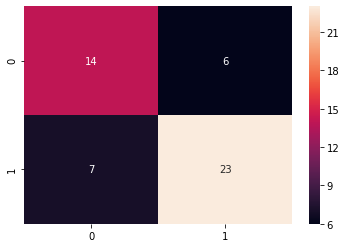

In [23]:
sns.heatmap(cm, annot=True)   #visualize the confusion matrix
plt.ylim(2,0) 

In [24]:
print(classification_report(y_test, predictions)) #print the performance of the algorith

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.79      0.77      0.78        30

    accuracy                           0.74        50
   macro avg       0.73      0.73      0.73        50
weighted avg       0.74      0.74      0.74        50



In [25]:
# construct the model after Normalization

In [26]:
min_train = X_train.min()  #get the minimum values of training features

In [27]:
range_train = (X_train-min_train).max()  #get range of the data features

In [28]:
X_train_scaled = (X_train-min_train)/range_train #normalizing the features

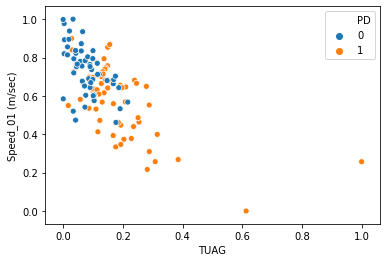

In [29]:
sns.scatterplot( x = X_train_scaled['TUAG'], y =X_train_scaled ['Speed_01 (m/sec)'],hue = 'PD', data = data) #viasualize the particular faetures after normalization

In [30]:
min_test = X_test.min()    #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [32]:
logmodel.fit(X_train_scaled, y_train) #train the model

C:\Users\musthaq ahamed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_predict = logmodel.predict(X_test_scaled) #test the model

In [34]:
cm = confusion_matrix(y_test, y_predict)  #define the confusion matrix as cm

(2, 0)

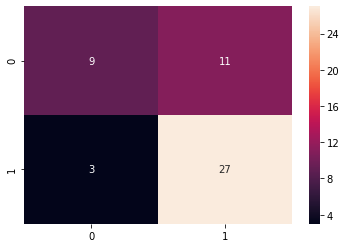

In [35]:
sns.heatmap(cm, annot=True)    #visualize the confusion matrix
plt.ylim(2,0)

In [36]:
print(classification_report(y_test,y_predict))  #print the performance of the algorithm

              precision    recall  f1-score   support

           0       0.75      0.45      0.56        20
           1       0.71      0.90      0.79        30

    accuracy                           0.72        50
   macro avg       0.73      0.68      0.68        50
weighted avg       0.73      0.72      0.70        50

